<a href="https://colab.research.google.com/github/AndrewSlutsky/MOC/blob/main/Moc_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [ ]:
import nltk
import lzma

import numpy as np

from random import choice
from typing import Callable

# Text preprocessing

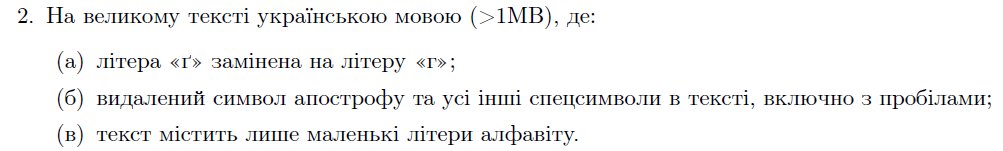

In [ ]:
def read_and_clean(filename: str) -> str:

    with open(filename, 'r', encoding = 'utf-8', errors = 'ignore') as file:
        text = file.read().lower()

    data = ''.join(s for s in text if s.isalpha())

    for s in 'abcdefghijklmnopqrstuvwxyz':
        data = data.replace(s, '')

    data = data.replace('ѳ', '')
    data = data.replace('ы', '')
    data = data.replace('ґ', 'г')

    return data

data = read_and_clean('Tolkin_Volodar-Persteniv_RuLit_Me.txt')
data[:150]

'джрртолкінволодарперстенівкартинкатриперснідляельфівдляїхкоролівсімгордимгномамзкаміннихпалатщедевятьлюдямсмертнихродіводинповелителютьмидеімлавмордор'

# l-gram freq

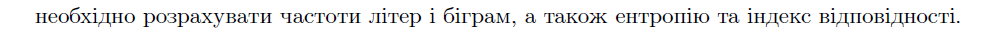

In [ ]:
def letters_frequencies(data: str) -> list:

    lett, freq = [], []

    for pair in nltk.FreqDist(data).most_common():
        lett.append(pair[0])
        freq.append(pair[1] / len(data))

    return sorted(dict(zip(lett, freq)).items(), key = lambda x: x[1], reverse = True)

alphab_letters_freq = letters_frequencies(data)
alphab_letters_freq

[('о', 0.09749816003650325),
 ('а', 0.08219558429176461),
 ('и', 0.06597277160260055),
 ('н', 0.06387557049076241),
 ('і', 0.06240564126173009),
 ('в', 0.059530092207435596),
 ('е', 0.05002812260434711),
 ('р', 0.0474506425326064),
 ('т', 0.04471034738306662),
 ('л', 0.04086964688012625),
 ('с', 0.03999483483201465),
 ('д', 0.03647619174001852),
 ('у', 0.03417636496709502),
 ('м', 0.03208733012875151),
 ('к', 0.030427535040969175),
 ('п', 0.029299058122430815),
 ('з', 0.025056168649880212),
 ('я', 0.022430711721358583),
 ('г', 0.020622902926486185),
 ('б', 0.01858848004213797),
 ('ь', 0.01374639025191933),
 ('ч', 0.012742449004173987),
 ('й', 0.01249541923096161),
 ('х', 0.01151240405904624),
 ('ш', 0.009266168455931215),
 ('ж', 0.008308672888686548),
 ('ю', 0.006976039132782586),
 ('щ', 0.005577564796828219),
 ('ц', 0.005002352907550639),
 ('ї', 0.004524625908115133),
 ('є', 0.00333592272255392),
 ('ф', 0.0028158331793650517)]

In [ ]:
def bigrams_frequencies(data: str) -> list:

    bigr, freq = [], []

    bigram_dist = nltk.FreqDist(nltk.bigrams(data)).most_common()
    bigram_сount = sum(pair[1] for pair in bigram_dist)

    for pair in bigram_dist:
        bigr.append(pair[0])
        freq.append(pair[1] / bigram_сount)

    return sorted(dict(zip(bigr, freq)).items(), key = lambda x: x[1], reverse = True)

alphab_bigrams_freq = bigrams_frequencies(data)
alphab_bigrams_freq

[(('н', 'а'), 0.013954126956014898),
 (('л', 'и'), 0.011895204200324916),
 (('р', 'о'), 0.011520065820197961),
 (('в', 'і'), 0.011392978124073319),
 (('о', 'в'), 0.010951488737937515),
 (('г', 'о'), 0.010126184301658214),
 (('а', 'в'), 0.010060343688003279),
 (('п', 'о'), 0.009865373808808045),
 (('о', 'р'), 0.009053849966084429),
 (('а', 'л'), 0.008973718366519895),
 (('н', 'е'), 0.00863124509704345),
 (('т', 'а'), 0.008423005016646447),
 (('д', 'о'), 0.008252023578085181),
 (('е', 'р'), 0.008221910429204242),
 (('о', 'г'), 0.00809584351778743),
 (('и', 'в'), 0.008082062924231744),
 (('с', 'т'), 0.007883009906205198),
 (('і', 'н'), 0.007844220087307716),
 (('т', 'и'), 0.007754391033018813),
 (('о', 'д'), 0.007753880640664898),
 (('з', 'а'), 0.007751328678895327),
 (('н', 'и'), 0.007670686686976879),
 (('н', 'і'), 0.0076068876427376015),
 (('і', 'в'), 0.007515017019033041),
 (('р', 'а'), 0.007062299001111124),
 (('с', 'я'), 0.0070245299669214716),
 (('і', 'д'), 0.007003603880410989),
 

# Entropy

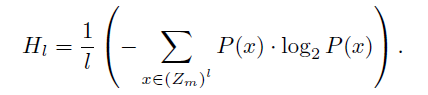

In [ ]:
def specific_entropy(l: int, fr_dist: list) -> float:

    return sum(pair[1] * np.log2(pair[1]) for pair in fr_dist) / -l

symbol_entropy = specific_entropy(1, letters_frequencies(data))
bigram_entropy = specific_entropy(2, bigrams_frequencies(data))

print(f'H1 = {symbol_entropy}')
print(f'H2 = {bigram_entropy}')

H1 = 4.563426478471458
H2 = 4.195534653290103


# Index

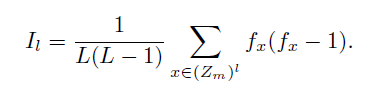

In [ ]:
def conformity_index(l: int, data: str) -> float:

    L = len(data)

    if l == 1:
        fr_dist = letters_frequencies(data)
        k = L
        
    if l == 2:
        fr_dist = bigrams_frequencies(data)
        k = sum(pair[1] for pair in nltk.FreqDist(nltk.bigrams(data)).most_common())

    return sum(k * pair[1] * (k * pair[1] - 1) for pair in fr_dist) / (L * (L - 1))

I1 = conformity_index(1, data)
I2 = conformity_index(2, data)

print(f'I1 = {I1}')
print(f'I2 = {I2}')

I1 = 0.050309032764728055
I2 = 0.00451028872691967


# Samples Gen

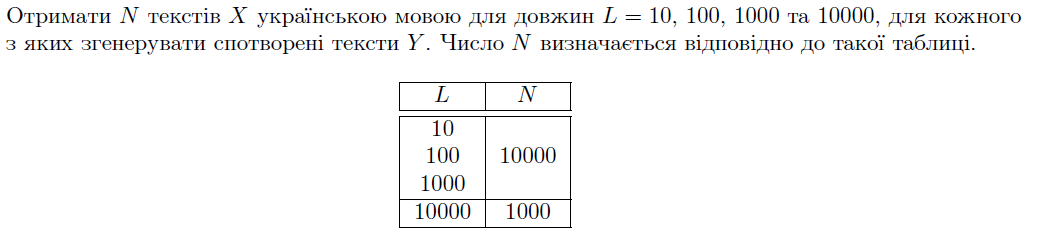

In [ ]:
def foo():

    return None

def generate_samples(data: str, L: int, N:int) -> list:

    samples = []

    for i in range(N):
        pos = choice(range(len(data) - L - 1))
        samples.append(data[pos:pos + L])

    return samples


def generate_all_samples(data: str, L: int, N: int, f: Callable, mode: int, vigenere: bool, r: int) -> [list, list]:

    samples = generate_samples(data, L, N)
    c_samples = []

    if not vigenere:
        for sample in samples:
            c_samples.append(f(sample, mode))

        return samples, c_samples

    else:
        for sample in samples:
            c_samples.append(Vigenere(sample, r))
            
        return samples, c_samples

# Corrupting helpers

In [ ]:
s_alphabet = 'абвгдеєжзиіїйклмнопрстуфхцчшщьюя'


def grouper(iterable: str, n: int) -> zip:

    args = [iter(iterable)] * n
    return zip(*args)


def get_bigram_num(bigram: str) -> int:

    return 32 * s_alphabet.index(bigram[0]) + s_alphabet.index(bigram[1])


def get_bigram_by_num(n: int) -> str:

    return s_alphabet[(n - n % 32) // 32] + s_alphabet[n % 32]


def text_encode(text: str, mode: int) -> list:

    ret = []

    if mode == 1:
        for s in text:
            ret.append(s_alphabet.index(s))

        return ret

    if mode == 2:
        for bigram in grouper(text, 2):
            ret.append(get_bigram_num(bigram))

        return ret


def text_decode(text: list, mode: int) -> str:

    ret = ''
    
    if mode == 1:
        for i in text:
            ret += s_alphabet[i]

        return ret

    if mode == 2:
        for i in text:
            ret += get_bigram_by_num(i)
            
        return ret

# Corrupting

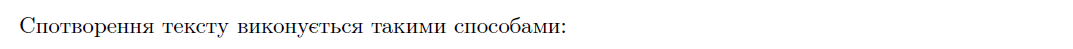

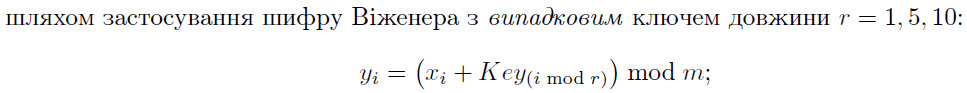

In [ ]:
def Vigenere(text: str, r: int) -> str:

    buff = []
    encoded = text_encode(text, 1)
    key = text_encode(''.join(choice(s_alphabet) for i in range(r)), 1)

    for i in encoded:
        buff.append((i + key[i % r]) % 32)

    return text_decode(buff, 1)

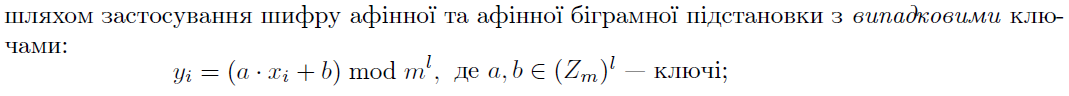

In [ ]:
def Affine(text: str, mode: int) -> str:

    buff = []
    encoded = text_encode(text, mode)

    if mode == 1:
        a = choice(range(32))
        b = choice(range(32))
        for i in encoded:
            buff.append((a * i + b) % 32)

        return text_decode(buff, 1)

    if mode == 2:
        a = choice(range(1024))
        b = choice(range(1024))
        for i in encoded:
            buff.append((a * i + b) % 1024)

        return text_decode(buff, 2)

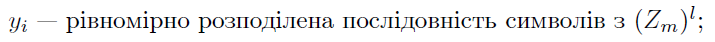

In [ ]:
def Uniform(text: str, mode: int) -> str:

    size = len(text)
    buff = []

    if mode == 1:
        for i in range(size):
            buff.append(choice(range(32)))

        return text_decode(buff, 1)

    if mode == 2:
        for i in range(int(size / 2)):
            buff.append(choice(range(1024)))

        return text_decode(buff, 2)

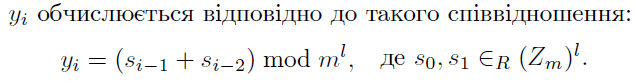

In [ ]:
def Fibonacci(text: str, mode: int) -> str:

    size = len(text)
    buff = []

    if mode == 1:
        s0 = choice(range(32))
        s1 = choice(range(32))
        buff.append(s0)
        buff.append(s1)
        for i in range(2, size):
            buff.append((buff[i - 1] + buff[i - 2]) % 32)

        return text_decode(buff, 1)

    if mode == 2:
        s0 = choice(range(1024))
        s1 = choice(range(1024))
        buff.append(s0)
        buff.append(s1)
        for i in range(2, int(size / 2)):
            buff.append((buff[i - 1] + buff[i - 2]) % 1024)

        return text_decode(buff, 2) 